<a href="https://colab.research.google.com/github/marcocivico/marcocivico.github.io/blob/main/LSTM_JaneAusten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# keras module for building LSTM 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku 
from wordcloud import WordCloud
from keras.utils import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [3]:
data=[]
with open("31100_mod.txt", "r", encoding="UTF-8") as file:
    data = file.read()

In [4]:
# EDA: Generating WordCloud to visualize
# the text
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="black").generate(data)

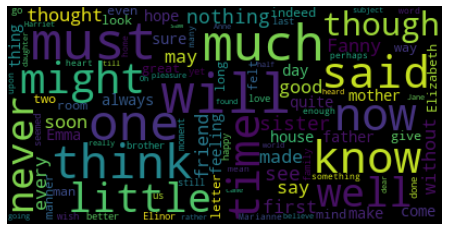

['persuasion', '', '', 'sir walter elliot, of kellynch hall, in somersetshire, was a man who,', 'for his own amusement, never took up any book but the baronetage; there', 'he found occupation for an idle hour, and consolation in a distressed', 'one; there his faculties were roused into admiration and respect, by', 'contemplating the limited remnant of the earliest patents; there any', 'unwelcome sensations, arising from domestic affairs changed naturally', 'into pity and contempt as he turned over the almost endless creations']


In [5]:
# Plotting the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("WordCloud.png")
plt.show()

In [ ]:
# Generating the corpus by 
# splitting the text into lines
corpus = data.lower().split("\n")
print(corpus[:10])

In [6]:
# Fitting the Tokenizer on the Corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
  
# Vocabulary count of the corpus
total_words = len(tokenizer.word_index)
  
print("Total Words:", total_words)

Total Words: 15108


In [1]:
# Converting the text into embeddings
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]

	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
										maxlen=max_sequence_len,
										padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words+1)

NameError: ignored

In [ ]:
# Building a Bi-Directional LSTM Model
model = Sequential()
model.add(Embedding(total_words+1, 100,
					input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words+1/2, activation='relu',
				kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
			optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
history = model.fit(predictors, label, epochs=150, verbose=1)

In [ ]:
seed_text = "The world"
next_words = 25
ouptut_text = ""

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences(
		[token_list], maxlen=max_sequence_len-1,
	padding='pre')
	predicted = np.argmax(model.predict(token_list,
										verbose=0), axis=-1)
	output_word = ""
	
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
			
	seed_text += " " + output_word
	
print(seed_text)